Here we import the vital Libraries

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the dataset
Read the Dataset

In [38]:
df = pd.read_csv("/content/kidney_disease_dataset.csv")
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


Here we can chech the how many columns and Rows in this dataset


In [39]:
df.shape

(20538, 43)

Here we can see the structure of the dataset


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

Here we can see the summary statistics for numerical columns

In [41]:
df.describe()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Random blood glucose level (mg/dl),Blood urea (mg/dl),Serum creatinine (mg/dl),Sodium level (mEq/L),Potassium level (mEq/L),...,Cholesterol level,Parathyroid hormone (PTH) level,Serum calcium level,Serum phosphate level,Body Mass Index (BMI),Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,...,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000
mean,47.477895,130.352079,1.015041,2.501266,2.494595,284.630295,104.094240,7.781865,135.076646,4.992314,...,200.236440,40.265400,9.001840,4.241157,27.544240,14.918152,14.946879,1.749459,5.061633,7.702504
std,24.941947,29.063838,0.005793,1.697084,1.701059,124.633265,55.726482,4.179925,8.651000,0.871026,...,57.863374,17.310488,0.867301,1.006735,7.221082,8.963722,8.945500,0.718980,2.853217,4.191765
min,5.000000,80.000000,1.005000,0.000000,0.000000,70.000000,7.002370,0.500000,120.000613,3.500005,...,100.000000,10.000045,7.500000,2.500000,15.000000,0.000000,0.000000,0.500000,0.100000,0.500000
25%,26.000000,105.000000,1.010000,1.000000,1.000000,176.000000,55.864665,4.200000,127.563468,4.229885,...,150.000000,25.396841,8.250000,3.380000,21.300000,7.000000,7.000000,1.130000,2.600000,4.050000
50%,47.000000,131.000000,1.015000,3.000000,2.000000,284.500000,104.401355,7.780000,135.044974,4.990991,...,200.000000,40.423386,8.990000,4.230000,27.600000,15.000000,15.000000,1.750000,5.070000,7.710000
75%,69.000000,156.000000,1.020000,4.000000,4.000000,393.000000,152.480048,11.430000,142.607311,5.749899,...,250.000000,55.272665,9.750000,5.110000,33.800000,23.000000,23.000000,2.370000,7.537500,11.297500
max,90.000000,180.000000,1.025000,5.000000,5.000000,500.000000,199.994361,15.000000,149.999914,6.499827,...,300.000000,69.999871,10.500000,6.000000,40.000000,30.000000,30.000000,3.000000,10.000000,15.000000


In [42]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
print(head)


In [47]:
label_encoders['Target'] = LabelEncoder()
df['Target'] = label_encoders['Target'].fit_transform(df['Target'])

In [49]:
X = df.drop('Target', axis=1)
y = df['Target']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [54]:
models = {
    'Logistic Regression': LogisticRegression(random_state=537, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=537),
    'Random Forest': RandomForestClassifier(random_state=537),
    'Gradient Boosting': GradientBoostingClassifier(random_state=537),
    'SVM': SVC(random_state=537, kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=537, max_iter=500)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name}: Accuracy = {accuracy:.4f}')

Logistic Regression: Accuracy = 0.8023
Decision Tree: Accuracy = 0.6276
Random Forest: Accuracy = 0.8023
Gradient Boosting: Accuracy = 0.7984
SVM: Accuracy = 0.8023
K-Nearest Neighbors: Accuracy = 0.7751
Naive Bayes: Accuracy = 0.8023
Neural Network: Accuracy = 0.7478


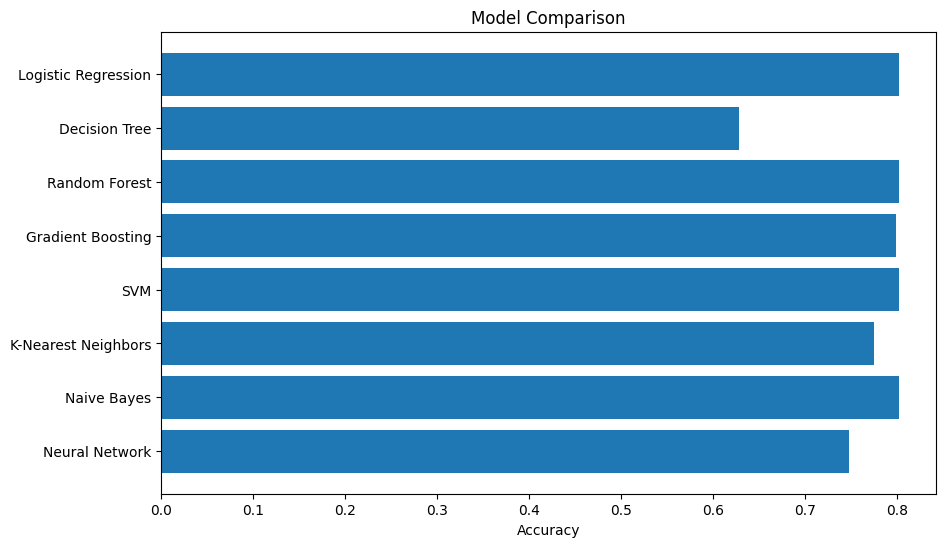

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(list(results.keys()), list(results.values()))
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.gca().invert_yaxis()
plt.show()
